# Convolutional Neural Networks Flower Classification

## Import Libraries

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Kaggle Dataset: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition?resource=download
- Download the dataset
- Upload to your Drive so you're able to use it

## Preprocessing input images

In [ ]:
# Initialize the data generator for preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Rescale pixel

train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/ColabNotebooks/flowers',
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load Validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/ColabNotebooks/flowers',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3465 images belonging to 5 classes.
Found 862 images belonging to 5 classes.


## Plot input images from train dataset after preprocessed

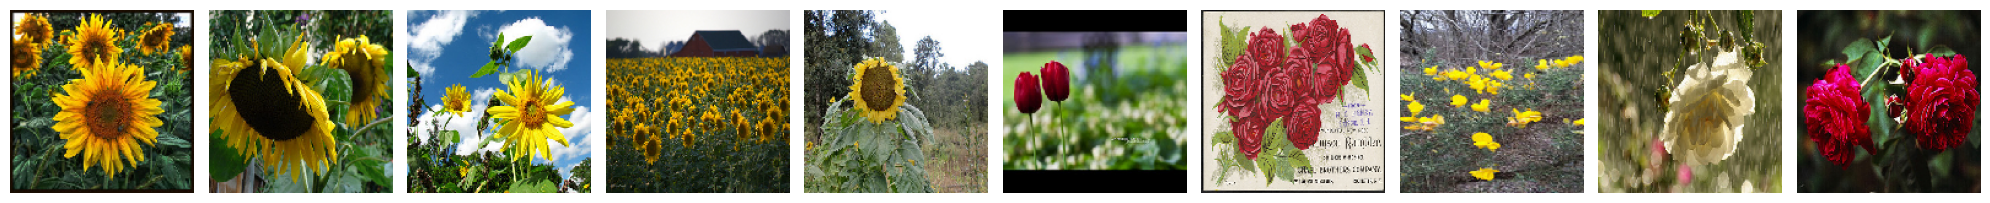

In [ ]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images from the training generator
images, labels = next(train_generator)
# Plot the first 10 images
plot_images(images[:10])

## Create Convolutional Neural Networks model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes of flowers
])

## Compile & Train the model

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint]
)

Epoch 1/10
109/109 [==============================] - ETA: 0s - loss: 1.3508 - accuracy: 0.4410

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


109/109 [==============================] - 708s 6s/step - loss: 1.3508 - accuracy: 0.4410 - val_loss: 1.0898 - val_accuracy: 0.5661
Epoch 2/10
109/109 [==============================] - 167s 2s/step - loss: 0.9711 - accuracy: 0.6237 - val_loss: 1.0310 - val_accuracy: 0.5882
Epoch 3/10
109/109 [==============================] - 164s 1s/step - loss: 0.6551 - accuracy: 0.7619 - val_loss: 1.0577 - val_accuracy: 0.6090
Epoch 4/10
109/109 [==============================] - 156s 1s/step - loss: 0.3593 - accuracy: 0.8814 - val_loss: 1.1547 - val_accuracy: 0.5940
Epoch 5/10
109/109 [==============================] - 154s 1s/step - loss: 0.1842 - accuracy: 0.9460 - val_loss: 1.3445 - val_accuracy: 0.5974
Epoch 6/10
109/109 [==============================] - 152s 1s/step - loss: 0.1008 - accuracy: 0.9755 - val_loss: 1.6153 - val_accuracy: 0.5974
Epoch 7/10
109/109 [==============================] - 148s 1s/step - loss: 0.0461 - accuracy: 0.9908 - val_loss: 1.6770 - val_accuracy: 0.6241
Epoch 8/10

## Plot Result

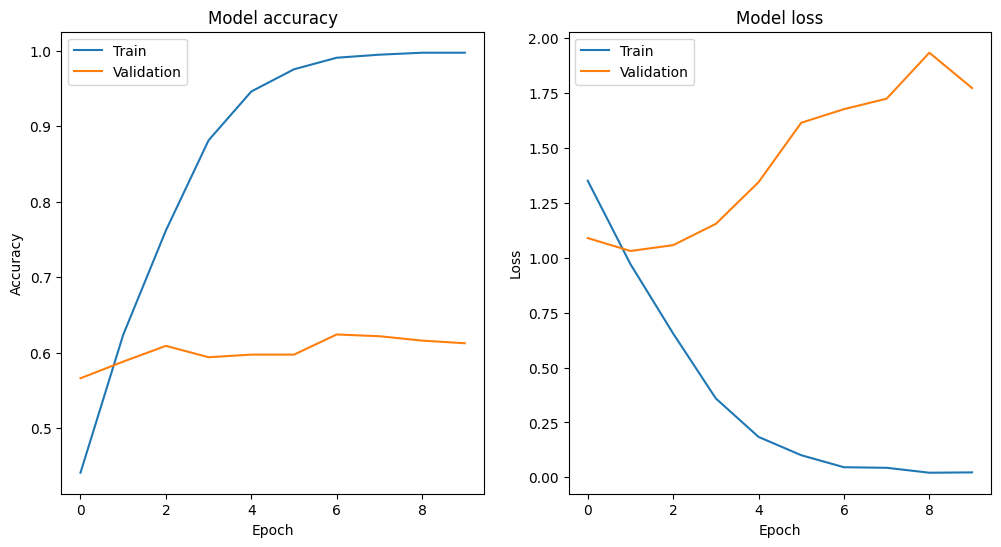

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

1/1 [==============================] - 0s 301ms/step


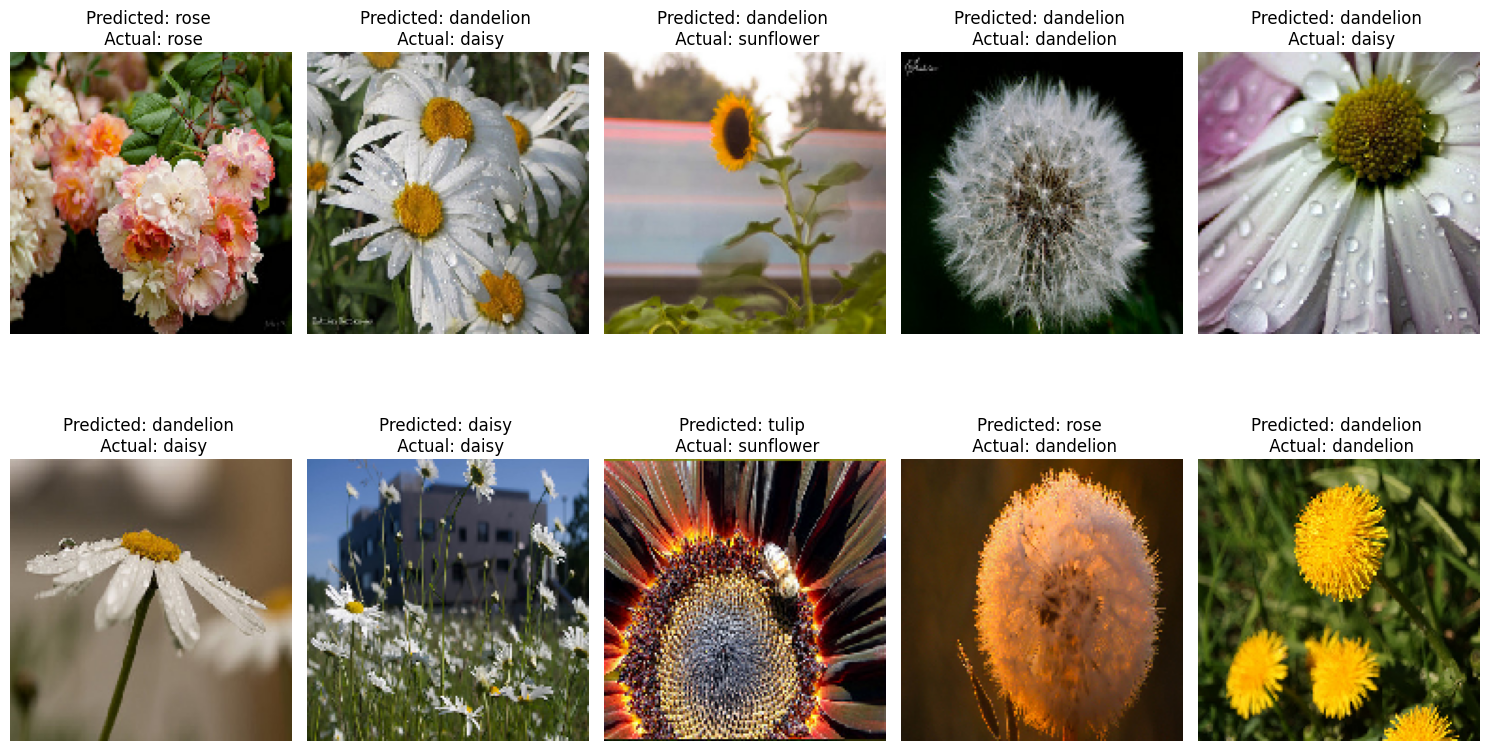

In [ ]:
model.load_weights('best_model.h5')
# Get a batch of images from the validation set
images, labels = next(validation_generator)
# Make predictions
predictions = model.predict(images)
# Map back to label
label_map = dict((v, k) for k, v in validation_generator.class_indices.items())

plt.figure(figsize=(15, 9))
for i in range(10):  # Display the first 10 images
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])

    # Get the index of the maximum predicted value
    pred_index = np.argmax(predictions[i])
    actual_index = np.argmax(labels[i])

    # Use the inverted label_map to get the corresponding class name
    pred_label = label_map[pred_index]
    actual_label = label_map[actual_index]

    plt.title(f"Predicted: {pred_label} \n Actual: {actual_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()